# Prepare input data for Bill's model

**About the notebook:**
- **Goal**
    - prepare a real fragment data count table from a region we know that contains regularoty elements
    - test Bill's Poisson model on some real data
- **current test region** 
    - around upstream region of PER1
    - chr17:8,148,987-8,159,379
- **input file for the model**
    1. beginning coordinate of the fragment
    2. ending coordinate of the fragment
    3. number of DNA reads mapping to this fragment
    4. number of RNA reads mapping to this fragment
- **Further information: How to deal with missing/drop-out values in fragment count?**
    - include only fragments that have at least 1 DNA read.  (It's OK if a fragment has no RNA reads.)  
    - ignore replicates (just pool replicates together.)

**Set environment**

In [1]:
suppressMessages(suppressWarnings(library("tidyverse")))
suppressMessages(suppressWarnings(library("gridExtra")))

In [2]:
### set global variables
FD_WRK = "/work/kk319"
FD_DAT = file.path(FD_WRK, "out/CombEffect_STARR/count_fragment")

## Import fragment count for Input and Output sample 
**(already pool from replicates)**

In [3]:
### init: column data types and names
ctypes = c(col_character(), col_integer(), col_integer(), col_integer())
cnames = c("Chrom", "Start", "End", "Count")

### import input fragment count data
dat_cnt_input_per1 = read_tsv(
    file.path(FD_DAT, "Input", "cnt_PER1.bed"), 
    col_names=cnames,
    col_types=ctypes)

### import output fragment count data
dat_cnt_dmso_per1 = read_tsv(
    file.path(FD_DAT, "TFX_DMSO", "cnt_PER1.bed"),
    col_names=cnames,
    col_types=ctypes)
dat_cnt_dex_per1  = read_tsv(
    file.path(FD_DAT, "TFX_Dex", "cnt_PER1.bed"), 
    col_names=cnames,
    col_types=ctypes)

**Show results**

In [4]:
head(dat_cnt_input_per1, 2)

Chrom,Start,End,Count
chr17,8148989,8149875,1
chr17,8148991,8149950,1


In [5]:
head(dat_cnt_dmso_per1, 2)

Chrom,Start,End,Count
chr17,8149037,8150068,1
chr17,8149037,8150069,1


In [8]:
head(dat_cnt_dex_per1, 2)

Chrom,Start,End,Count
chr17,8148987,8150011,1
chr17,8148987,8150013,1


## Arrange data based on the column descriptions

**Show summary statistics**

In [9]:
dat_input = dat_cnt_input_per1
dat_input = dat_input %>% mutate(ID=paste(Chrom, Start, End, sep="_"))

dat_dmso = dat_cnt_dmso_per1
dat_dmso = dat_dmso %>% mutate(ID=paste(Chrom, Start, End, sep="_"))

dat_dex = dat_cnt_dex_per1
dat_dex = dat_dex %>% mutate(ID=paste(Chrom, Start, End, sep="_"))

frag_input = dat_input$ID
frag_dmso  = dat_dmso$ID
frag_dex   = dat_dex$ID

In [10]:
cat("#Frag (Input):       ", length(frag_input), "\n")
cat("#Frag (Output; DMSO):", length(frag_dmso),  "\n")
cat("#Frag (Output; Dex): ", length(frag_dex),   "\n")
cat("#Overlap (Input vs DMSO):", length(intersect(frag_input, frag_dmso)), "\n")
cat("#Overlap (Input vs Dex): ", length(intersect(frag_input, frag_dex)),  "\n")
cat("#Overlap (DMSO  vs Dex): ", length(intersect(frag_dmso,  frag_dex)),  "\n")

#Frag (Input):        805 
#Frag (Output; DMSO): 2066 
#Frag (Output; Dex):  4827 
#Overlap (Input vs DMSO): 109 
#Overlap (Input vs Dex):  172 
#Overlap (DMSO  vs Dex):  536 


**include only fragments that have at least 1 DNA read**

In [15]:
dat_input = dat_cnt_input_per1 %>% dplyr::rename("Input" ="Count")
dat_dmso  = dat_cnt_dmso_per1  %>% dplyr::rename("Output"="Count")
dat_dex   = dat_cnt_dex_per1   %>% dplyr::rename("Output"="Count")

dat_input_dmso = left_join(dat_input, dat_dmso, by=c("Chrom", "Start", "End")) %>% replace_na(list(Output=0))
dat_input_dex  = left_join(dat_input, dat_dex,  by=c("Chrom", "Start", "End")) %>% replace_na(list(Output=0))


dat_input_dmso = dat_input_dmso %>% dplyr::select(-Chrom)
dat_input_dex  = dat_input_dex  %>% dplyr::select(-Chrom)

**Save table**

In [17]:
write_tsv(dat_input_dmso, file.path(FD_DAT, "dat_cnt_input_dmso_PER1.tsv"), col_names = FALSE)
write_tsv(dat_input_dex,  file.path(FD_DAT, "dat_cnt_input_dex_PER1.tsv"),  col_names = FALSE)

In [18]:
print(file.path(FD_DAT, "dat_cnt_input_dmso_PER1.tsv"))

[1] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_input_dmso_PER1.tsv"


In [19]:
print(file.path(FD_DAT, "dat_cnt_input_dex_PER1.tsv"))

[1] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_input_dex_PER1.tsv"


## Visualization: Distribution of counts

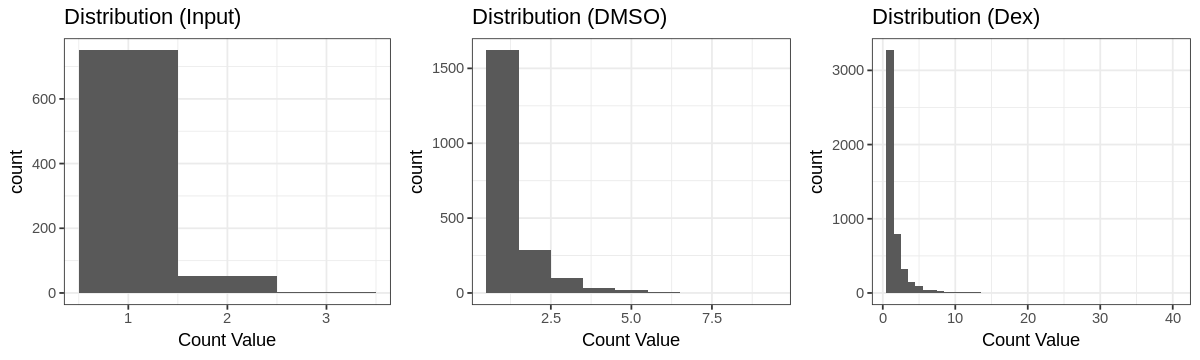

In [12]:
gp1 = ggplot(dat_cnt_input_per1, aes(x=Count)) + 
   geom_histogram(binwidth = 1) +
   theme_bw() +
   labs(x="Count Value", title="Distribution (Input)")

gp2 = ggplot(dat_cnt_dmso_per1, aes(x=Count)) + 
   geom_histogram(binwidth = 1) +
   theme_bw() +
   labs(x="Count Value", title="Distribution (DMSO)")

gp3 = ggplot(dat_cnt_dex_per1, aes(x=Count)) + 
   geom_histogram(binwidth = 1) +
   theme_bw() +
   labs(x="Count Value", title="Distribution (Dex)")

options(repr.plot.width=10, repr.plot.height=3)
grid.arrange(gp1, gp2, gp3, nrow=1)